# Explore here

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle


PREPARACION DE LOS DATOS|
--

In [55]:
# Cargar y guardar en local el dataframe
pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv').to_csv('/workspaces/k_means_tutorial/data/raw/housing.csv')

In [79]:
# instanciamos el dataframe
df = pd.read_csv('/workspaces/k_means_tutorial/data/raw/housing.csv')
# Mostramos estructura
display(df.head(2), df.tail(2))

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [80]:
# Filtramos el dataframe para uqedarnos con las columnas necesarias
df = df[['Latitude', 'Longitude', 'MedInc']]

In [81]:
# Dividimos los datos en conjuntos de train y test
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

---

CREACION DEL MODELO K-MEANS|
--

In [82]:
# Creamos instancia del modelo kmeans
kmeans = KMeans(n_clusters=6, random_state=42)
# Generamos los 6 clusteres que demanda el enunciado
train['cluster'] = kmeans.fit_predict(train[['Latitude', 'Longitude', 'MedInc']])

VISUALIZACION DE CLUSTERS|
--

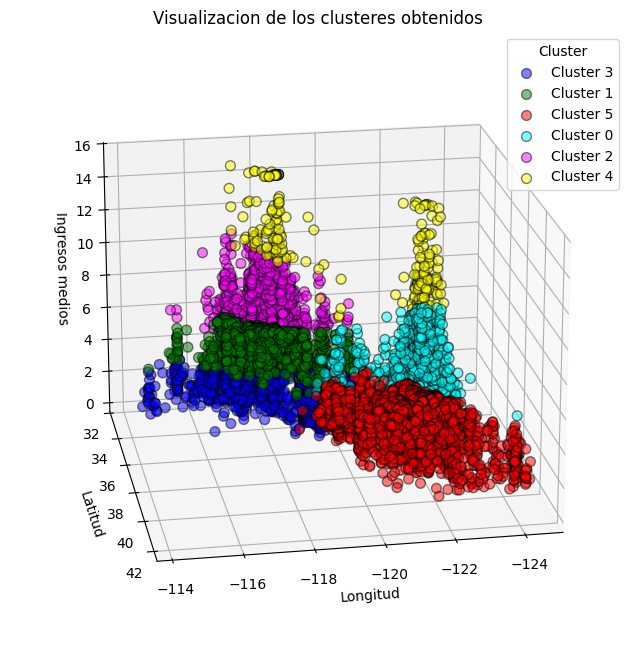

In [83]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores por cluster
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for i, color in zip(train['cluster'].unique(), colors):
    subset = train[train['cluster'] == i]
    ax.scatter(subset['Longitude'], subset['Latitude'], subset['MedInc'], s=50, alpha=0.5,marker='o',edgecolors='k', c=[color], label=f'Cluster {i}')


# Configuracion de la vista
ax.view_init(elev=20, azim=80)
# Etiquetas
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Ingresos medios')
ax.set_title('Visualizacion de los clusteres obtenidos')
ax.legend(title='Cluster')

plt.show()


CONCLUSION|
--

- Se observan dos puntos geograficos mayoritarios sobre los que se desarrollan en el eje z los niveles de ingresos medios.
- En una de esas zonas se aprecian 4 tramos de ingresos medios mientras que en la otra solo hay tres
- Parece extraerse de esta visualizacion que la zona cuya base es el cluster 3 tiene mayor diversidad de rentas con clusteres mas poblados en el eje z, lo que implica mas rentas medias y medias-altas.
- Sin embargo en la zona cuya base es el cluster 5, correspondiente a las rentas mas bajas, este  mayoritario, lo que podria implicar una menor diferenciacion de rentas, con mayoria de clase baja, media-baja. 

---

PREDICCION DEL CONJUNTO DE TEST|
--

In [84]:
# Realizamos las predicciones sobre el conjunto de test
test['cluster'] = kmeans.predict(test[['Latitude', 'Longitude', 'MedInc']])

GRAFICO DE LOS RESULTADOS CON EL CONJUNTO DE TEST|
--

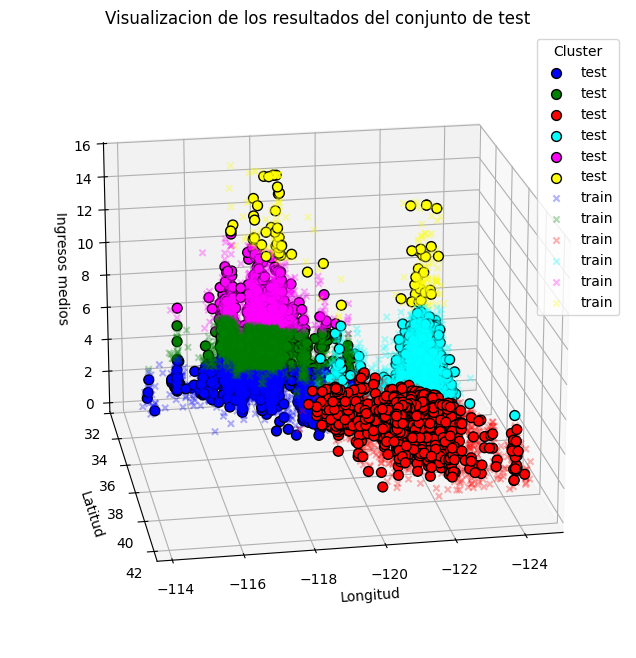

In [85]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores por cluster
colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for i, color in zip(train['cluster'].unique(), colores):
    subset = test[test['cluster'] == i]
    ax.scatter(subset['Longitude'], subset['Latitude'], subset['MedInc'],edgecolor='k',   s=50, alpha=1, c=color,marker='o', label='test')

for i, color in zip(train['cluster'].unique(), colores):
    subset = train[train['cluster'] == i]
    ax.scatter(subset['Longitude'], subset['Latitude'], subset['MedInc'],s=20, alpha=0.3,marker='x', c=color, label='train')


# Configuración de la vista
ax.view_init(elev=20, azim=80)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Ingresos medios')
ax.set_title('Visualizacion de los resultados del conjunto de test')
ax.legend(title='Cluster')

plt.show()


CREACION DEL MODELO PREDICTIVO SUPERVISADO|
--

In [86]:
# Conjuntos de train y test
X_train = train.drop('cluster', axis=1)
y_train = train['cluster']
X_test = test.drop('cluster', axis=1)
y_test = test['cluster']

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instancia del modelo de clasfificacion
rforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rforest.fit(X_train, y_train)

# Predicciones en el conjunto de test
y_pred = rforest.predict(X_test)


In [93]:
# ACCURACY y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9956
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [89]:
# Lista del resto de modelos para evaluar
models = [LogisticRegression(max_iter=5000),DecisionTreeClassifier(),SVC()] 
    

# Bucle para entrenar y evaluar cada modelo
for model in models:
    # Entrenar
    model.fit(X_train, y_train)  
    # Predecir sobre el modelo actual
    y_pred = model.predict(X_test)
    # Evaluarlo  
    accuracy = accuracy_score(y_test, y_pred) 
    print(f"{model} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression(max_iter=5000) Accuracy: 0.9838
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       561
           1       0.98      0.98      0.98       983
           2       0.97      0.96      0.96       299
           3       0.98      0.99      0.99      1111
           4       1.00      0.92      0.96        62
           5       0.99      0.98      0.99      1112

    accuracy                           0.98      4128
   macro avg       0.98      0.97      0.98      4128
weighted avg       0.98      0.98      0.98      4128

DecisionTreeClassifier() Accuracy: 0.9939
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       1.00      0.99      1.00       983
           2       1.00      0.99      0.99       299
           3       0.99      1.00      0.99      1111
           4       0.94      0.98      0.96        62
           5       1.00      0.99      

GUARDAR EL MEJOR MODELO|
--

In [91]:
with open('/workspaces/k_means_tutorial/models/mejor_modelo.pkl', 'wb') as file:
    pickle.dump(rforest, file)

print("Modelo guardado!")

Modelo guardado!
